# Feature Engineeting in Tree Model
Data : tips     
Target : tip       
Preprocess v1:
1. One Hot Encoding : sex, smoker, time
2. Ordinal Encoding : day
3. No Treatment : size, total_bill
Random state 10, data splitting 70:30, model Tree (max depth 3)      
         
Preprocess v2:
1. One Hot Encoding : sex, smoker
2. Ordinal Encoding : time, day
3. No Treatment : size, total_bill
Random state 10, data splitting 70:30, model Tree (max depth 3)      

> ## Library

In [1]:
!pip install category_encoders

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

> ## Data

In [5]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocess v1:

Preprocess v1:
1. One Hot Encoding : sex, smoker, time
2. Ordinal Encoding : day
3. No Treatment : size, total_bill

In [6]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [54]:
onehot_var = ['sex', 'smoker', 'time']
onehot = OneHotEncoder(drop = 'first')

ordinal_var = ['day']
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat': 3, 'Sun': 4}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = ordinal_var, mapping = ordinal_mapping)

In [63]:
transformer1 = ColumnTransformer([
                                 ('one hot encoder',onehot,onehot_var),
                                 ('ordinal encoder',ordinal_encoder,['day'])
                                ], remainder = 'passthrough')

> ## Preprocess v2:
1. One Hot Encoding : sex, smoker
2. Ordinal Encoding : time, day
3. No Treatment : size, total_bill

In [109]:
onehot_var = ['sex', 'smoker']
onehot = OneHotEncoder()

ordinal_var = ['day', 'time']
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':1,'Thur':2,'Sat':3,'Sun':4}},
    {'col':'time',
     'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day','time'],mapping = ordinal_mapping)

In [110]:
transformer2 = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker']),
                                 ('ordinal encoder',ordinal_encoder,['day','time'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [56]:
var = ['total_bill','sex','smoker','day','time','size']
x = tips[var]
y = tips['tip']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10)
x_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


> ## Data Transform

In [111]:
x_train_prep1 = transformer1.fit_transform(x_train)
x_test_prep1 = transformer1.transform(x_test)

x_train_prep2 = transformer2.fit_transform(x_train)
x_test_prep2 = transformer2.transform(x_test)

x_train_prep1 = pd.DataFrame(x_train_prep1)
x_test_prep1 = pd.DataFrame(x_test_prep1)

x_train_prep2 = pd.DataFrame(x_train_prep2)
x_test_prep2 = pd.DataFrame(x_train_prep2)

C:\Users\user\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\user\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [112]:
transformer1.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [113]:
transformer1.transformers_[1][1].get_feature_names()

['day']

In [114]:
transformer2.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes'], dtype=object)

In [115]:
transformer2.transformers_[1][1].get_feature_names()

['day', 'time']

In [88]:
features1 = list(transformer1.transformers_[0][1].get_feature_names()) + list(transformer1.transformers_[1][1].get_feature_names()) + ['total_bill','size']
x_train_prep1.columns = features1
x_test_prep1.columns = features1
x_train_prep1

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,0.0,3.0,17.59,3.0
179,1.0,0.0,0.0,4.0,21.58,2.0
180,1.0,0.0,0.0,3.0,13.28,2.0
181,0.0,0.0,1.0,1.0,29.80,6.0


In [116]:
features2 = list(transformer2.transformers_[0][1].get_feature_names()) + list(transformer2.transformers_[1][1].get_feature_names()) + ['total_bill','size']
x_train_prep2.columns = features2
x_test_prep2.columns = features2
x_train_prep2

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,2.0,1.0,29.80,6.0


> ## Model Prep v1

In [125]:
model = DecisionTreeRegressor(max_depth=3)

In [126]:
model.fit(x_train_prep1, y_train)

DecisionTreeRegressor(max_depth=3)

In [96]:
y_pred_test = model.predict(x_test_prep1)
mean_squared_error(y_test, y_pred_test)

0.8414314225960589

> ## Model Prep v1

In [97]:
model2 = DecisionTreeRegressor(max_depth=3)

In [118]:
model2.fit(x_train_prep2, y_train)

DecisionTreeRegressor(max_depth=3)

In [119]:
y_pred_test2 = model2.predict(x_test_prep2)
mean_squared_error(y_test, y_pred_test)

0.8414314225960589

> ## Tree Model and Importance Value

In [127]:
model.feature_importances_

array([0.       , 0.1113078, 0.       , 0.       , 0.8886922, 0.       ])

In [128]:
importance_table1 = pd.DataFrame({
    'imp':model.feature_importances_}
    , index = features1
)
importance_table1

,imp
x0_Male,0.000000
x1_Yes,0.111308
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.000000


<AxesSubplot:>

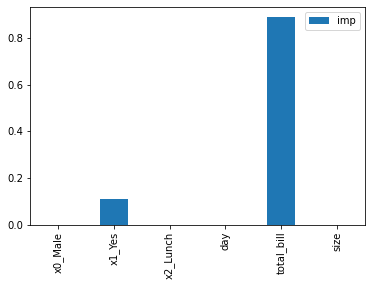

In [129]:
importance_table1.plot(kind = 'bar')

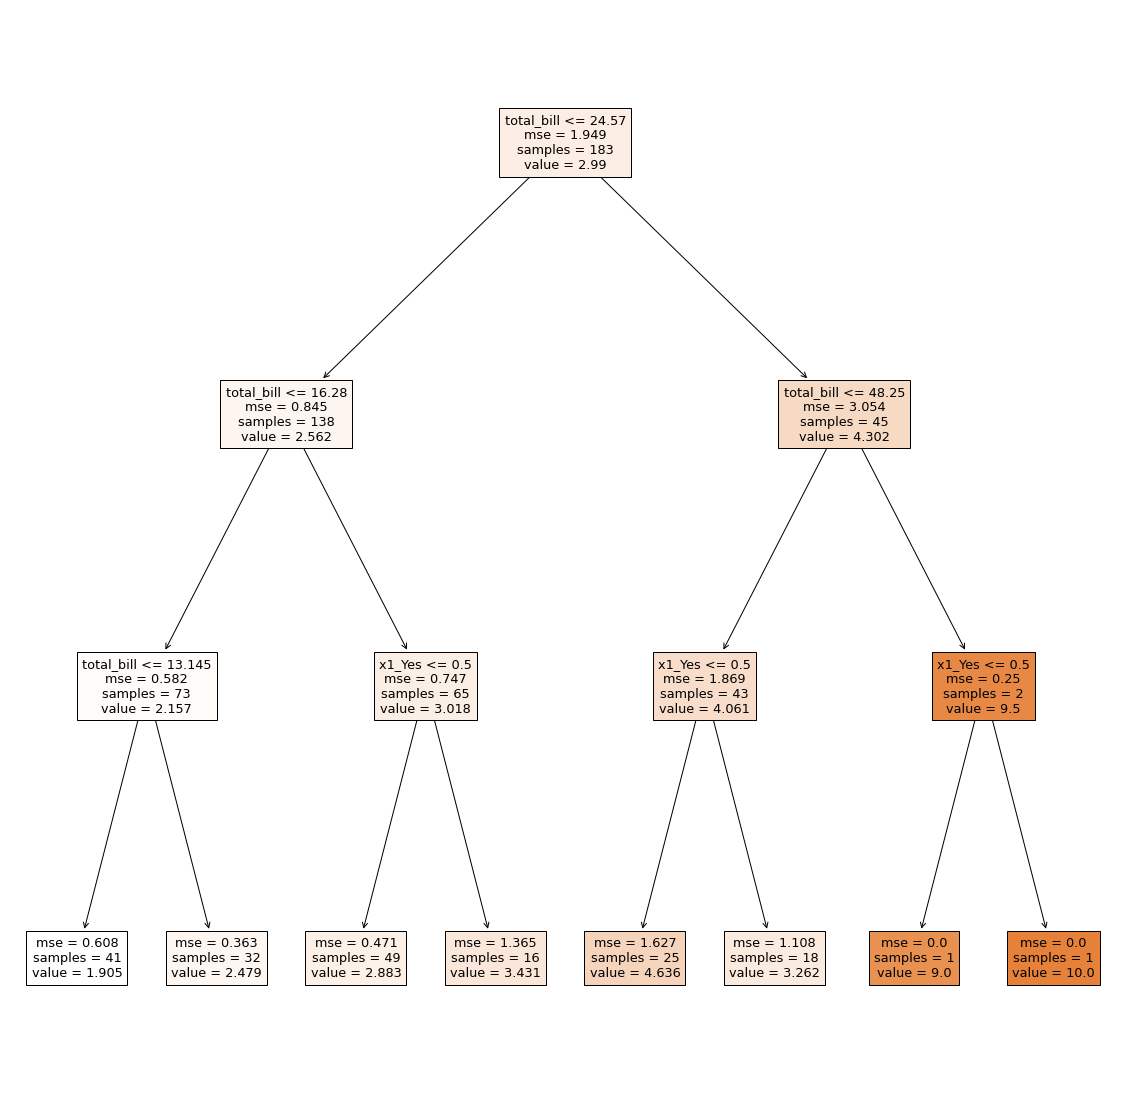

In [130]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names = features1, filled = True)
plt.show()